[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/ProjIntegrador_PO_IA/blob/main/kmeans_knn.ipynb)


# Aplicações de Pesquisa Operacional e Inteligência Artificial



# Introdução

Nesta aula, veremos dois procedimentos baseados em distâncias. O primeiro, k-médias, é um algoritmo de **clustering**, classificado como um procedimentos de aprendizado **não supervisionado**. Já o segundo procedimento, o k-NN, consiste em um algoritmo de aprendizado **supervisionado** que efetua tarefas de **classificação**. 

- K-médias - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
- K-NN - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Conjunto de dados


Trabalharemos com um conjunto de dados do Legathum Prosperity Index que avalia países com base em 12 indicadores socioeconômicos. Os dados estão armazenados em uma planilha Excel. Para realizar a leitura, utilizaremos a biblioteca Pandas.

In [80]:
import pandas as pd

In [98]:
# Leitura dos dados
df = pd.read_excel("Dados/LegathumProsperityIndex.xlsx", index_col=0)
df

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,33.789790,27.584089,42.908371,31.180731,50.984080,25.369609,30.074881,38.917452,40.483353,41.213431,19.707759,22.321369
Albania,41.812902,70.909222,56.705192,47.941511,73.840451,60.948098,52.371794,73.942627,58.272572,59.775177,73.093347,44.916907
Algeria,37.829283,61.872381,44.439207,39.638376,72.474167,48.768323,37.948012,76.616391,44.887023,39.558238,75.229796,47.035936
Angola,31.436429,27.698718,33.344907,33.809068,50.290275,31.615920,22.786481,42.352122,50.496019,40.180216,61.393916,44.111879
Argentina,36.141480,71.396228,46.953394,55.930430,77.190560,54.347328,53.463726,80.639101,58.565825,77.574621,70.426563,51.259266
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.480679,61.673231,19.876372,12.411471,70.479853,38.962141,27.892377,68.816784,57.612096,40.631422,41.404139,44.195216
Vietnam,58.058186,66.635876,54.553812,44.332611,76.483508,62.956281,44.915391,71.844818,52.709400,40.101889,67.708660,63.941717
Yemen,26.054433,28.721303,34.391678,17.406987,57.022509,28.351917,27.487667,44.573426,45.338774,22.947790,26.477436,41.196835


Podemos inicialmente explorar o conjunto de dados com algumas estatísticas. Utilizaremos inicialmente o método describe. Em seguida, Vamos plotar alguns histogramas.

In [82]:
df.describe()

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,49.728324,58.935263,55.017199,50.576514,68.850292,54.259432,53.245681,68.934884,55.570335,57.493387,67.209064,52.722309
std,13.282860,19.396583,14.080078,19.024859,11.156494,18.378302,15.507026,19.877150,8.825453,18.229057,17.519851,9.021388
min,22.676816,15.295863,19.876372,12.411471,32.813523,18.271392,22.510719,21.123150,33.674930,19.293779,16.003198,22.321369
25%,39.612078,44.227910,45.963785,37.721469,60.241028,37.316741,40.236598,53.302451,49.838641,42.398092,58.733124,47.281894
50%,48.027355,61.872381,54.385836,46.157691,72.325967,56.823672,52.341816,74.449208,55.031990,57.883563,68.550468,51.926712
75%,59.936176,74.179475,64.595865,61.564136,77.088233,70.562382,63.917604,85.578124,60.378821,69.817405,80.328765,57.274584
max,79.273966,91.269614,87.480224,91.040314,86.631312,87.963158,86.432947,96.182409,77.978229,94.094046,95.749693,77.239559


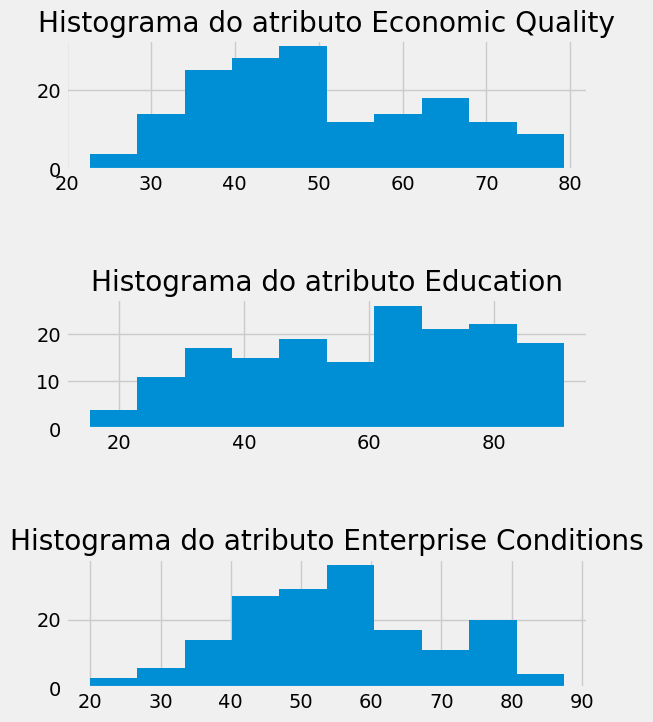

In [83]:
plt.figure(1 , figsize = (6 , 8))
n = 0 
for atributo in ['Economic Quality',	'Education',	'Enterprise Conditions']:
    n += 1
    plt.subplot(3 , 1 , n)
    plt.subplots_adjust(hspace = 1 , wspace = 1)
    plt.hist(df[atributo])
    plt.title('Histograma do atributo {}'.format(atributo))

plt.show()

In [84]:
# Exercício: Repita o procedimento acima escolhendo outros atributos

## Prodecimentos de Normalização

Em algoritmos baseados em distância, assim como em outros modelos de Aprendizado de Máquina, é comum efetuar algumas etapas de pré-processamento de dados. Uma dessas etapas é a normalização da matriz de atributos.


A normalização de dados refere-se ao processo de escalar os atributos de um conjunto de dados de forma que eles estejam dentro de um intervalo específico, como [0, 1] ou [-1, 1]. 

Isso pode ser feito de várias maneiras, e o scikit-learn fornece duas abordagens comuns: 
- Min-Max Scaling
- Z-score Standardization.


Min-Max Scaling, também conhecido como normalização intervalar [0, 1], é uma técnica que redimensiona os valores de um atributo para que fiquem dentro do intervalo especificado. 

A fórmula para Min-Max Scaling é dada por:

$$X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

Onde:

- X: Valor original do atributo
- $X_{\text{min}}$: Valor mínimo do atributo no conjunto de dados
- $X_{\text{max}}$: Valor máximo do atributo no conjunto de dados


Por sua vez, a Z-score Standardization, também conhecida como padronização, transforma os valores de uma característica para que tenham uma média de 0 e um desvio padrão de 1. 

A fórmula para Z-score Standardization é dada por:

$$X_{\text{scaled}} = \frac{X - \mu}{\sigma}$$

Onde:
- X: Valor original do atributo
- $\mu$: Média do atributo no conjunto de dados
- $\sigma$:Desvio padrão do atributo no conjunto de dados


In [85]:
# Importando os métodos
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [86]:
# Instanciando os procedimentos
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Realizando as transformações
df_minmax = min_max_scaler.fit_transform(df)
df_standardized = standard_scaler.fit_transform(df)

# Passando os dados normalizados para DataFrames
df_minmax = pd.DataFrame(df_minmax, columns=df.columns, index = df.index)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns, index = df.index)

In [87]:
df_minmax

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,0.196352,0.161743,0.340691,0.238707,0.337631,0.101852,0.118334,0.237070,0.153678,0.293042,0.046454,0.000000
Albania,0.338110,0.732008,0.544774,0.451870,0.762330,0.612364,0.467147,0.703704,0.555210,0.541193,0.715895,0.411440
Algeria,0.267725,0.613061,0.363335,0.346271,0.736943,0.437597,0.241501,0.739326,0.253076,0.270914,0.742686,0.450025
Angola,0.154771,0.163252,0.199227,0.272134,0.324739,0.191479,0.004314,0.282829,0.379680,0.279229,0.569188,0.396781
Argentina,0.237904,0.738418,0.400525,0.553473,0.824579,0.517650,0.484229,0.792920,0.561829,0.779153,0.682455,0.526927
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.084878,0.610439,0.000000,0.000000,0.699886,0.296889,0.084191,0.635413,0.540302,0.285262,0.318521,0.398299
Vietnam,0.625144,0.675760,0.512951,0.405972,0.811441,0.641179,0.350499,0.675755,0.429640,0.278182,0.648373,0.757861
Yemen,0.059678,0.176712,0.214711,0.063533,0.449832,0.144644,0.077859,0.312423,0.263273,0.048850,0.131344,0.343702


In [88]:
df_standardized

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital
Alternativa,,,,,,,,,,,,
Afghanistan,-1.203541,-1.621186,-0.862584,-1.022563,-1.606234,-1.576681,-1.498707,-1.514689,-1.714626,-0.895763,-2.719439,-3.380009
Albania,-0.597705,0.619180,0.120246,-0.138920,0.448633,0.365038,-0.056524,0.252692,0.307108,0.125550,0.336874,-0.867813
Algeria,-0.898513,0.151880,-0.753533,-0.576668,0.325799,-0.299681,-0.989466,0.387611,-1.214152,-0.986836,0.459185,-0.632217
Angola,-1.381247,-1.615258,-1.543846,-0.883995,-1.668610,-1.235784,-1.970127,-1.341375,-0.576693,-0.952613,-0.332916,-0.957317
Argentina,-1.025962,0.644363,-0.574433,0.282263,0.749819,0.004797,0.014103,0.590599,0.340436,1.104919,0.184201,-0.162663
...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,-1.679951,0.141582,-2.503290,-2.012095,0.146503,-0.834859,-1.639873,-0.005959,0.232045,-0.927787,-1.477326,-0.948051
Vietnam,0.629000,0.398203,-0.033010,-0.329184,0.686253,0.474636,-0.538810,0.146836,-0.325143,-0.956923,0.028602,1.247386
Yemen,-1.787649,-1.562380,-1.469278,-1.748727,-1.063359,-1.413919,-1.666050,-1.229287,-1.162811,-1.900784,-2.331876,-1.281414


## Aplicando o k-médias

Utilizaremos os dados normalizados com o procedimento intervalar. Para a aplicação do k-médias, basta utilizarmos o procedimento da biblioteca sklearn.

In [89]:
from sklearn.cluster import KMeans

k = 3 # Faremos o teste com 3 clusters

# Instanciando o modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustando o modelo aos dados normalizados
kmeans.fit(df_minmax)

# Adicionando os rótulos de cluster aos dados originais
df['Cluster Labels'] = kmeans.labels_

In [90]:
df

,Economic Quality,Education,Enterprise Conditions,Governance,Health,Infrastructure and Market Access,Investment Environment,Living Conditions,Natural Environment,Personal Freedom,Safety and Security,Social Capital,Cluster Labels
Alternativa,,,,,,,,,,,,,
Afghanistan,33.789790,27.584089,42.908371,31.180731,50.984080,25.369609,30.074881,38.917452,40.483353,41.213431,19.707759,22.321369,1
Albania,41.812902,70.909222,56.705192,47.941511,73.840451,60.948098,52.371794,73.942627,58.272572,59.775177,73.093347,44.916907,2
Algeria,37.829283,61.872381,44.439207,39.638376,72.474167,48.768323,37.948012,76.616391,44.887023,39.558238,75.229796,47.035936,2
Angola,31.436429,27.698718,33.344907,33.809068,50.290275,31.615920,22.786481,42.352122,50.496019,40.180216,61.393916,44.111879,1
Argentina,36.141480,71.396228,46.953394,55.930430,77.190560,54.347328,53.463726,80.639101,58.565825,77.574621,70.426563,51.259266,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,27.480679,61.673231,19.876372,12.411471,70.479853,38.962141,27.892377,68.816784,57.612096,40.631422,41.404139,44.195216,1
Vietnam,58.058186,66.635876,54.553812,44.332611,76.483508,62.956281,44.915391,71.844818,52.709400,40.101889,67.708660,63.941717,2
Yemen,26.054433,28.721303,34.391678,17.406987,57.022509,28.351917,27.487667,44.573426,45.338774,22.947790,26.477436,41.196835,1


É comum no uso do k-means que testemos qual a quantidade ideal de clusters. 

Para isso, procedimentos comuns são:
- Curva do cotovelo;
- Curva da silhueta;

Vejamos o funcionamento da curva do cotovelo, onde testaremos valores de $k$ de 1 a 10 e calcularemos a inércia para cada um. 

Em seguida, a curva do cotovelo será plotada para visualizarmos a tendência. 

O valor de k ideal será aquele em que a curva começa a se achatar, formando um "cotovelo". Assim, escolhemos um valor de k que corresponda ao ponto onde a inércia começa a diminuir a uma taxa menor.

In [94]:
df = pd.read_excel("Dados/LegathumProsperityIndex.xlsx", index_col=0)
df_minmax = min_max_scaler.fit_transform(df)


inertia = []
for k in range(1, 11):  # Teste valores de k de 1 a 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_minmax)
    inertia.append(kmeans.inertia_)

# Plote a curva do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Curva do Cotovelo para Escolha de k')
plt.grid(True)
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'